<a href="https://colab.research.google.com/github/MoralesCMaJo/Tarea-2--An-lisis-de-series-temporales/blob/main/3_Working_with_Time_Series_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pregunta 3
# Importación de paquetes relevantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import scipy.stats
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import shutil

# Ruta del archivo en Google Drive
ruta_drive = "/content/drive/My Drive/Index_2023.csv"

# Ruta de destino en Google Colab
ruta_colab = "/content/Index_2023.csv"

# Copia el archivo desde Google Drive a Google Colab
shutil.copy(ruta_drive, ruta_colab)#Importación de datos y preprocesamiento
raw_csv_data = pd.read_csv("Index_2023.csv")
df_comp = raw_csv_data.copy()
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.set_index("Date", inplace=True)
# Eliminar la primera fila de datos (para evitar problemas con las diferencias de zona horaria)
df_comp = df_comp.iloc[1:]

# Establecer la frecuencia de los datos a días laborables ('b')
df_comp = df_comp.asfreq('b')
# Rellenar valores faltantes utilizando el método de relleno hacia adelante (ffill)
df_comp = df_comp.fillna(method='ffill')
# Restablecer el índice para que "Date" sea una columna
df_comp = df_comp.reset_index()

df_comp['market_value']=df_comp.spx
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Unnamed: 0,market_value
6195,2017-10-09,6195.0,2544.729980
6196,2017-10-10,6196.0,2550.639893
6197,2017-10-11,6197.0,2555.239990
6198,2017-10-12,6198.0,2550.929932
6199,2017-10-13,6199.0,2553.169922


In [ ]:
# Ruido blanco
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))
df['wn'] = wn
df.describe()

<ipython-input-44-0c29d8d942c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


,Unnamed: 0,market_value,wn
count,6200.000000,6200.000000,6200.000000
mean,3099.500000,1271.953292,1268.828650
std,1789.930166,466.265760,465.740235
min,0.000000,438.920013,-820.037346
25%,1549.750000,987.692505,944.903907
50%,3099.500000,1226.869995,1275.050860
75%,4649.250000,1451.029999,1576.578296
max,6199.000000,2555.239990,2937.455521


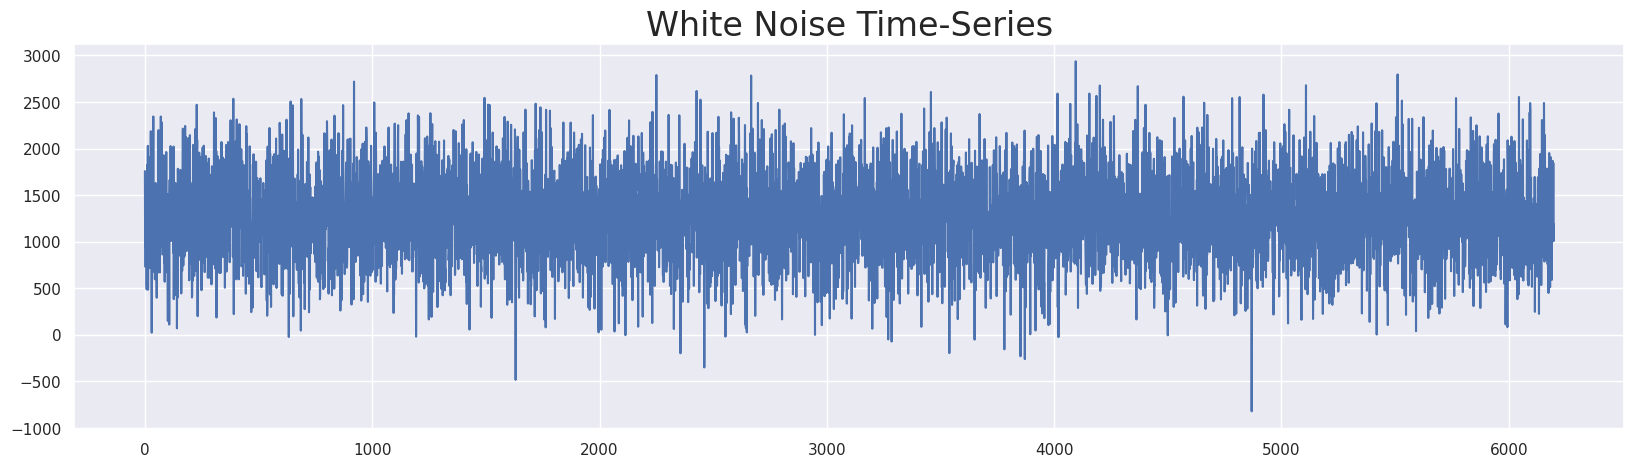

In [ ]:
#Serie de tiempo de ruido blanco
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

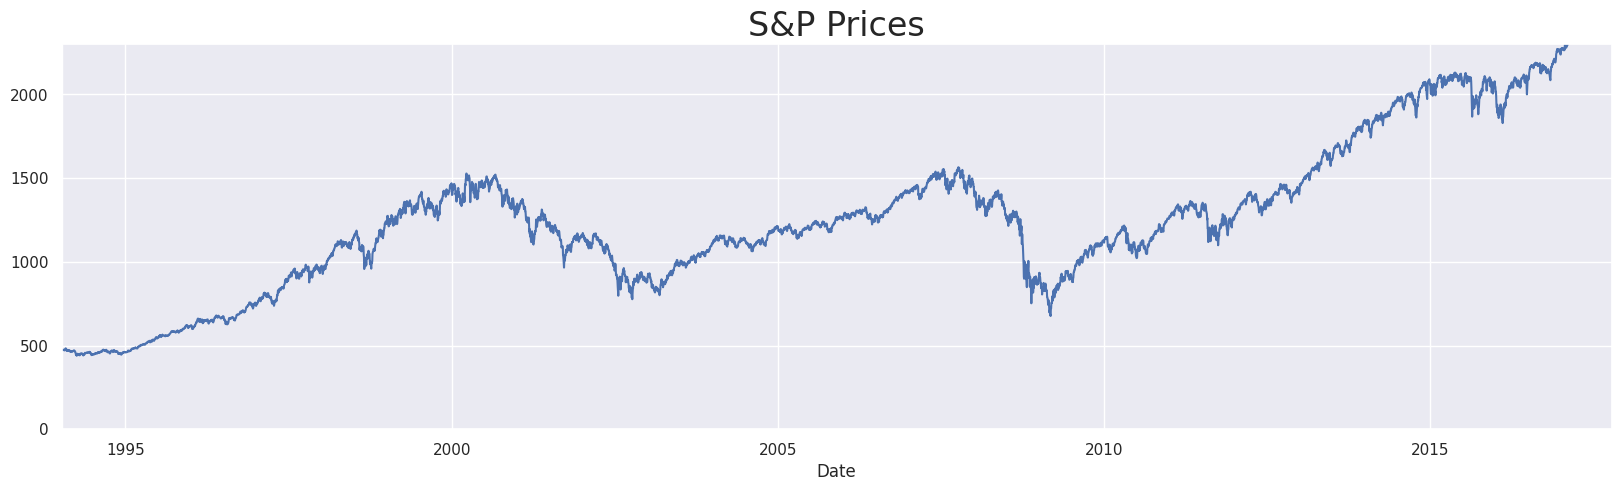

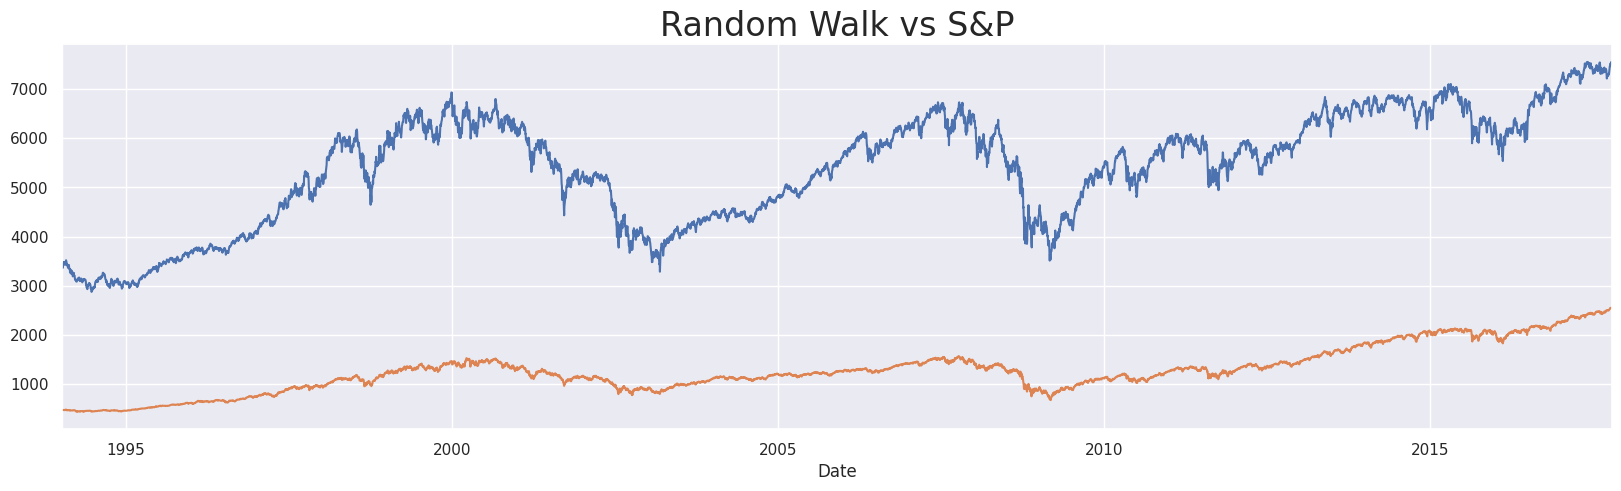

In [ ]:
# Precios S&P
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

rw = pd.read_csv("RandWalk.csv")
rw.Date = pd.to_datetime(rw.Date, dayfirst = True)
rw.set_index("Date", inplace = True)
rw = rw.asfreq('b')
rw.describe()

df['rw'] = rw.price
df.head()

df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

In [ ]:
#Stationarity
sts.adfuller(df.market_value)
sts.adfuller(df.wn)
sts.adfuller(df.rw)


(-1.649316559277408,
 0.4573968837473425,
 6,
 6193,
 {'1%': -3.431406355974594,
  '5%': -2.8620068149070077,
  '10%': -2.5670184827348006},
 67682.0971902317)

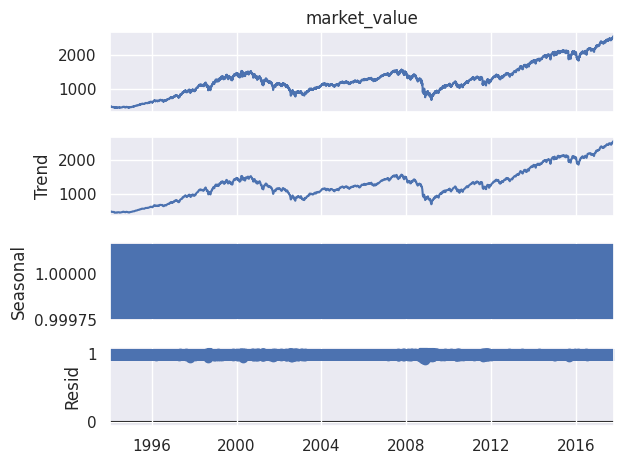

In [ ]:
# Seasonality
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()


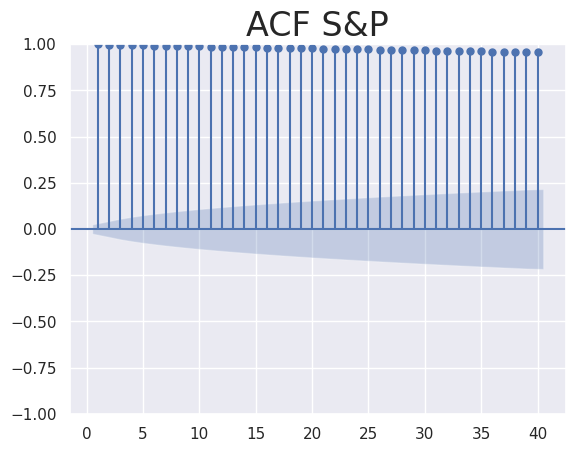

In [ ]:
# ACF
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()


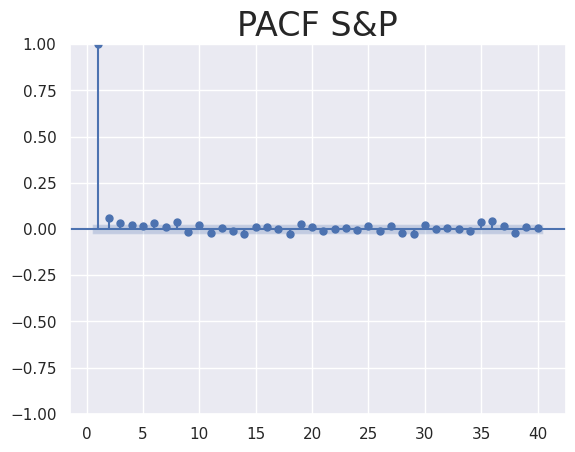

In [ ]:
# PACF
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()